<a href="https://colab.research.google.com/github/abhay43/Human_Pose_Detection/blob/master/Demo-%20Masking%20and%20Pose%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/content/Human_Pose_Detection/utils.py'>

In [1]:
!git clone https://github.com/abhay43/Human_Pose_Detection

Cloning into 'Human_Pose_Detection'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 49 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [2]:
cd /content/Human_Pose_Detection

/content/Human_Pose_Detection


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
!pip uninstall keras

Uninstalling Keras-2.3.1:
  Would remove:
    /tensorflow-1.15.2/python3.6/Keras-2.3.1.dist-info/*
    /tensorflow-1.15.2/python3.6/docs/*
    /tensorflow-1.15.2/python3.6/keras/*
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1


In [5]:
!pip install q keras==2.0.8

     |████████████████████████████████| 276kB 6.0MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [6]:
!python --version

Python 3.6.9


In [7]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
COCO_DIR = "images"  # TODO: enter value here
IMAGE_DIR = os.path.join(ROOT_DIR, "picture")

Using TensorFlow backend.


... done downloading pretrained model!


In [8]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7

inference_config = InferenceConfig()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=inference_config)







Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
pwd

'/content/Human_Pose_Detection'

In [11]:
def unzipme(location):
  import zipfile
  with zipfile.ZipFile(location) as zip_ref:
    zip_ref.extractall()
    print('done')

In [12]:
unzipme('/content/drive/My Drive/Colab Notebooks/Dataset - Human Pose Estimation')

done


In [13]:
unzipme('/content/Human_Pose_Detection/Pose_Dataset.zip')

done


In [14]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [15]:
IMAGE_DIR = '/content/Human_Pose_Detection/Pose_Dataset/train'

In [55]:
import cv2
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'person']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
#BGR->RGB
image = image[:,:,::-1]



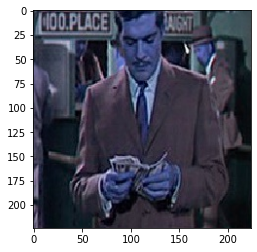

In [56]:
plt.imshow(image)
from PIL import Image
from numpy import (amin, amax, ravel, asarray, cast, arange, ones, newaxis,
                   transpose, iscomplexobj, uint8, issubdtype, array)

In [57]:
# Run detection
results = model.detect_keypoint([image], verbose=1)

Processing 1 images
image                    shape: (224, 224, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max:  624.00000
windows                  shape: (1, 4)                min:  400.00000  max:  624.00000
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:   -8.32302  max:   77.47622
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -3.21213  max:    3.34738
detections               shape: (1, 100, 6)           min:    0.00000  max:  618.00000
mrcnn_mask               shape: (1, 100, 28, 28, 2)   min:    0.00025  max:    0.99958
mrcnn_keypoint_prob    

/content/Human_Pose_Detection/utils.py:716: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(ts, int):
/content/Human_Pose_Detection/utils.py:719: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(size), float):


rois                     shape: (2, 4)                min:    0.00000  max:  218.00000
keypoints                shape: (2, 17, 3)            min:    0.00000  max:  202.00000
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000
keypoints                shape: (2, 17, 3)            min:    0.00000  max:  202.00000
masks                    shape: (224, 224, 2)         min:    0.00000  max:    1.00000
scores                   shape: (2,)                  min:    0.88568  max:    0.99951
keypoint_shape: (2, 17, 3)


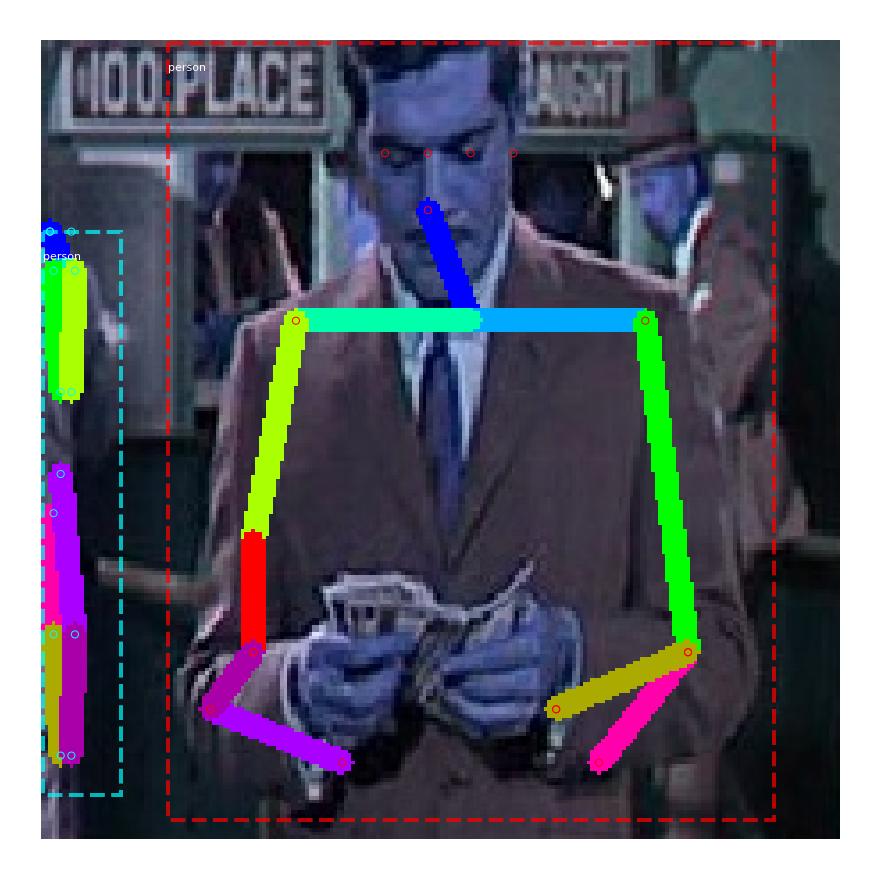

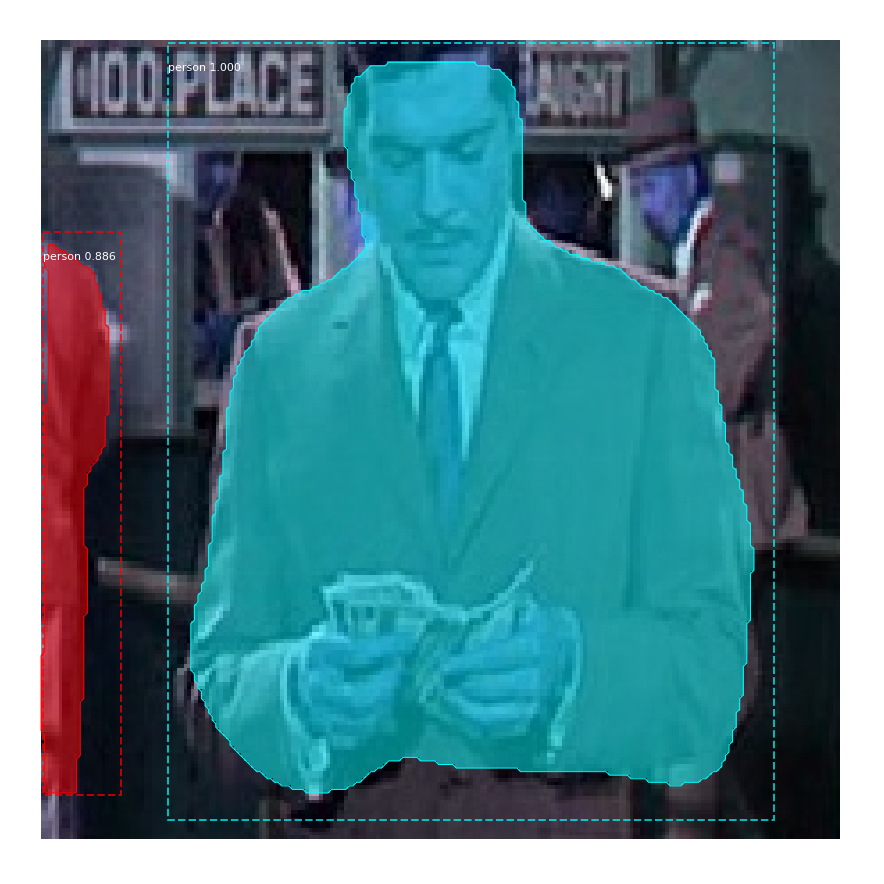

In [58]:
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names,skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
